# Recommending friends on the basis of mutual friends

## Import libraries

In [76]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
df = pd.read_csv("../data/facebook-links.txt.anon", sep="\s+", header=None)
df.head()

0  1   2
0  1  2  \N
1  1  3  \N
2  1  4  \N
3  1  5  \N
4  1  6  \N

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545686 entries, 0 to 1545685
Data columns (total 3 columns):
0    1545686 non-null int64
1    1545686 non-null int64
2    1545686 non-null object
dtypes: int64(2), object(1)
memory usage: 35.4+ MB


In [79]:
def convertToAdjacenyList(graphDf):
    """
    Function to convert given graph dataFrame in below format : 
        1 2
        1 3
        1 4
        2 10
    into format like below and return the same:
        1 2 3 4
        2 10
    """
    with open("../data/adjList_UW.txt", 'w') as fileHandler:
        for user in df[0].unique():
            userFriendList = df[df[0]==user][1].values
            fileHandler.write(str(user)+" ")
            for friend in userFriendList:
                fileHandler.write(str(friend)+" ")
            fileHandler.write("\n")

# uncomment the below line to reconstruct the graph.
# graph already constructed

# convertToAdjacenyList(df)

In [80]:
G= nx.read_adjlist("../data/testData")

In [81]:
"""
readDataInMem: Read data from provided file into a list (one record per line)
               Returns list
"""

def readDataInMem():
    cols=[]
    rows=[]
    with open("../data/testData",'r') as fr:
        for line in fr:
            cols=line.split()
            if cols[-1]=='\\N':
                cols[-1]='0'
            cols=list(map(int,cols))
            rows.append(cols)
    return rows

In [82]:
rows=readDataInMem()

In [83]:

"""
buildPerUserFrndLst: Build dict of {userId:[friendList]} from list provided
                     Returns the built dict
"""

def buildPerUserFrndLst(rows):
    frndMap={}
    for r in rows:
        if r[0] in frndMap:
            prevList=frndMap[r[0]]
            newSet=set(prevList+r[1:])
            frndMap[r[0]]=list(newSet)
        else:
            frndMap[r[0]]=r[1:]
            
            
    return frndMap

In [84]:
frndMap=buildPerUserFrndLst(rows)

In [85]:
"""
recommendFrnd: 1. Read data from file containing friends
               2. Build per user friendList 
               3. Find most probable friend for given seed on the 
                  basis of max mutual friends
"""

def recommendFrnd(seed,frndMap):
    level1Frnds=[]
    level1Frnds=frndMap[seed] # Friend list for the provided seed (format: List of friend Ids)
    probableFrnd=0
    support=0
    probableFrnd,support=frndWithMaxMutualCount(level1Frnds,frndMap,seed)   # probable friend Id and tot mutual friends
    return probableFrnd,support

 



"""
frndWithMaxMutualCount: Calculate the occurence of each Id found at level2 (i.e. friends of level1 friends)
                        Returns the userId with max count and count
"""

def frndWithMaxMutualCount(level1Frnds,frndMap,seed):
    level2Frnds= set()
    freqCnt={}
    thisFrndFrnds=[]

    #iterate through level1 friends

    for i in level1Frnds:
        if i in frndMap.keys():        
            thisFrndFrnds=frndMap[i]
                                     #get friendlist of level1 friend
            for j in thisFrndFrnds:  #for each friend l2 of level1 friend l1,
                if j != seed:       # if l1 not one of level1 friend add t to set
                                     # and set frequency to 1. 
                    if j not in level1Frnds: 
                        if j in level2Frnds:
                            freqCnt[j]=freqCnt[j]+1
                        else:
                            level2Frnds.add(j)
                            freqCnt[j]=1
    if len(freqCnt)>0:
        friendToSuggest=max(freqCnt, key=freqCnt.get)
        len(frndMap.values())
        return friendToSuggest,freqCnt[friendToSuggest]
    else:        
        return 0,0

    
                
    

In [91]:
"""
Get suggestion for all users by calling recommendFrnd iteratively for all users
"""


visited={} #this will keep userId:[suggested friend id, max no of mutual friends]
supportFreq={} 
noMutualToShow=set()
listOfMutualFrndCnt=[]
for seed in frndMap:
    probableFrnd,support=recommendFrnd(seed,frndMap)     
    visited[seed]=[]
    visited[seed].append(probableFrnd)
    visited[seed].append(support)
    
    #if no friend to suggest then keep the track of such userId
    if support==0:
        noMutualToShow.add(seed)
     
    # maintains the count of support /suggestions
    if support in supportFreq:
        supportFreq[support]=supportFreq[support]+1
    else:
        supportFreq[support]=1
    
    #list of every occurence of support
    listOfMutualFrndCnt.append(support)
    
    



        

In [92]:
#total users
print("Total users in dataset: "+str(len(visited)))



#suggestions to show for each userid
listOfSugg=[]
for user in visited:
    tempDict={}  
    tempDict['max_mutual_frnds']=visited[user][1]      
    tempDict['suggest']=visited[user][0]
    tempDict['user']=user
    listOfSugg.append(tempDict)
    
  
dfSugg = pd.DataFrame(listOfSugg)
dfSugg



Total users in dataset: 94


max_mutual_frnds            suggest               user
0                  1          792398235   1120299124684544
1                  1         1198993888          784855172
2                  1   1120299124684544  10202939550824451
3                  1         1198993888  10203819650923780
4                  1   1120299124684544  10152428102382341
5                  3    998051830247469  10207648390994439
6                  1  10201274848029232    754643311235080
7                  1    902025849828256  10207029106439434
8                  1       597232940418  10101768040479501
9                  1    758102710876995  10203783090936847
10                 1  10207648390994439    750078275061264
11                 1       597232940418  10100755017830162
12                 1   1120299124684544   1247590478586871
13                 1       597232940418  10152834062440985
14                 1  10100428308394559         1017415450
15                 1         1198993888          669460260
16                 3  10153023973252170  10153337055681066
17                 1       597232940418  10101574555604743
18                 1       597232940418  10153252686761004
19                 1   1120299124684544    998051830247469
20                 1   1120299124684544  10152576520467293
21                 1    758102710876995    627171307370032
22                 1   1120299124684544  10205393822950193
23                 1  10201274848029232          606052915
24                 1  10154744136190128    618938378248500
25                 1       597232940418  10100503692547898
26                 1       597232940418  10100428308394559
27                 1  10154986580795624    758102710876995
28                 1    758102710876995    863468127007304
29                 2  10208997875883454  10153023973252170
..               ...                ...                ...
64                 1  10201274848029232    846314905418676
65                 1    902025849828256  10152942733530549
66                 1    902025849828256  10153659520113082
67                 1   1120299124684544  10203881668262331
68                 1   1120299124684544   1134289383252668
69                 3  10153023973252170  10208997875883454
70                 1       597232940418  10152821309813189
71                 1       597232940418  10152952776844743
72                 1       597232940418  10100998965586764
73                 1         1198993888       859854448375
74                 2  10153023973252170  10206768727161037
75                 1  10201274848029232  10203509688399570
76                 1   1120299124684544  10204837590290929
77                 1    758102710876995    725662194222549
78                 1         1198993888         1382432735
79                 1          784855172         1198993888
80                 1       597232940418  10104505905291490
81                 1       597232940418  10103809753734779
82                 1   1120299124684544         1787367144
83                 1    758102710876995   1721220374568938
84                 1    902025849828256    987497397936109
85                 1  10201274848029232   1078785372138222
86                 1       597232940418  10155369201895037
87                 1   1120299124684544  10202337963916273
88                 1   1120299124684544  10204720293754610
89                 1  10201274848029232         1713083637
90                 1  10154744136190128  10152827378086902
91                 1  10201274848029232    878084965575159
92                 1    758102710876995  10204982606225535
93                 2    828332217185661  10153478616753407

[94 rows x 3 columns]

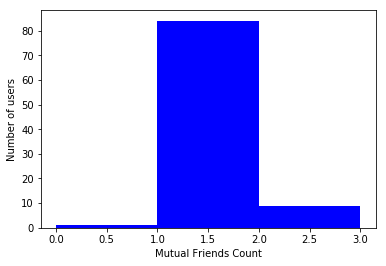

In [93]:
plt.hist(listOfMutualFrndCnt,color='b',bins=range(min(listOfMutualFrndCnt),max(listOfMutualFrndCnt)+1))
plt.xlabel('Mutual Friends Count')
plt.ylabel('Number of users')
plt.show()


In [95]:
#number of users with no mutual friend to show
print("Total users with No recommendations: "+(str(len(noMutualToShow))))
print("Inference: These users are disjoint graphs i.e. they are cyclic and every user of a graph is friend with all the users present in the same graph.")

#userids with no mutual friend to show

noMutualToShowDf= pd.DataFrame(list(noMutualToShow))
noMutualToShowDf


Total users with No recommendations: 1
Inference: These users are disjoint graphs i.e. they are cyclic and every user of a graph is friend with all the users present in the same graph.


0
0  610445452